In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preparation

In [2]:
# load the excel file
file_path = r"C:\Users\minvo4\Downloads\CMA - Test - Copy.xlsx"

In [3]:
# Load the data
xls = pd.ExcelFile(file_path)
xls.sheet_names

['Case study 1']

In [4]:
# Load the data from the first sheet
df = pd.read_excel(xls, sheet_name="Case study 1")

# Display basic info and first few rows to understand structure
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2914 non-null   datetime64[ns]
 1   # of Orders      2914 non-null   int64         
 2   Status of Order  2914 non-null   object        
 3   Order value      2914 non-null   float64       
 4   Category         2914 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 114.0+ KB


(None,
         Date  # of Orders Status of Order  Order value    Category
 0 2016-01-01          180       Cancelled   76076000.0        FMCG
 1 2016-01-01           10       Cancelled    1960140.0        FMCG
 2 2016-01-01        28380       Cancelled  489898500.0  Stationery
 3 2016-01-01            0       Cancelled     728000.0        FMCG
 4 2016-01-01           10       Cancelled     136500.0        FMCG)

In [8]:
# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Convert Order Value to numeric (handling any potential issues)
df["Order value"] = pd.to_numeric(df["Order value"], errors="coerce")

# Convert Number of Orders to integer (handling any potential issues)
df["# of Orders"] = pd.to_numeric(df["# of Orders"], errors="coerce", downcast="integer")

# Check for missing values
missing_values = df.isnull().sum()

# Display cleaned dataset and missing values
df.head(), missing_values

(        Date  # of Orders Status of Order  Order value    Category
 0 2016-01-01          180       Cancelled   76076000.0        FMCG
 1 2016-01-01           10       Cancelled    1960140.0        FMCG
 2 2016-01-01        28380       Cancelled  489898500.0  Stationery
 3 2016-01-01            0       Cancelled     728000.0        FMCG
 4 2016-01-01           10       Cancelled     136500.0        FMCG,
 Date               0
 # of Orders        0
 Status of Order    0
 Order value        0
 Category           0
 dtype: int64)

### Snapshot of Business Performance Overview

In [10]:
# Summary statistics of numerical columns
summary_stats = df.describe()

# Count of orders by status
order_status_counts = df["Status of Order"].value_counts()

# Total revenue by order status
revenue_by_status = df.groupby("Status of Order")["Order value"].sum().sort_values(ascending=False)

# Display results
summary_stats, order_status_counts, revenue_by_status


(                                Date    # of Orders   Order value
 count                           2914    2914.000000  2.914000e+03
 mean   2016-02-15 23:19:58.352779520   18094.780371  4.162460e+08
 min              2016-01-01 00:00:00       0.000000  0.000000e+00
 25%              2016-01-24 00:00:00      30.000000  1.765400e+06
 50%              2016-02-16 00:00:00     260.000000  1.787490e+07
 75%              2016-03-10 00:00:00    4370.000000  2.225305e+08
 max              2016-04-01 00:00:00  468570.000000  1.035899e+10
 std                              NaN   61774.744425  1.328251e+09,
 Status of Order
 Completed         1012
 Cancelled         1002
 Deliver failed     808
 Picking up          92
 Name: count, dtype: int64,
 Status of Order
 Completed         9.559623e+11
 Cancelled         2.145924e+11
 Deliver failed    4.221306e+10
 Picking up        1.732034e+08
 Name: Order value, dtype: float64)

In [12]:
# Create a summary table for quick business performance insights
summary_table = pd.DataFrame({
    "Total Orders": df["# of Orders"].sum(),
    "Completed Orders": order_status_counts["Completed"],
    "Cancelled Orders": order_status_counts["Cancelled"],
    "Deliver Failed Orders": order_status_counts["Deliver failed"],
    "Picking Up Orders": order_status_counts["Picking up"],
    "Total Revenue": df["Order value"].sum(),
    "Revenue from Completed Orders": revenue_by_status["Completed"],
    "Revenue Lost from Cancelled Orders": revenue_by_status["Cancelled"],
    "Revenue Lost from Failed Deliveries": revenue_by_status["Deliver failed"],
}, index=["Business Snapshot"])

summary_table


,Total Orders,Completed Orders,Cancelled Orders,Deliver Failed Orders,Picking Up Orders,Total Revenue,Revenue from Completed Orders,Revenue Lost from Cancelled Orders,Revenue Lost from Failed Deliveries
Business Snapshot,52728190,1012,1002,808,92,1.212941e+12,9.559623e+11,2.145924e+11,4.221306e+10


C:\Users\minvo4\AppData\Local\Temp\ipykernel_8204\1340195626.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette="coolwarm", ax=axes[0])
C:\Users\minvo4\AppData\Local\Temp\ipykernel_8204\1340195626.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_status.index, y=revenue_by_status.values, palette="viridis", ax=axes[1])


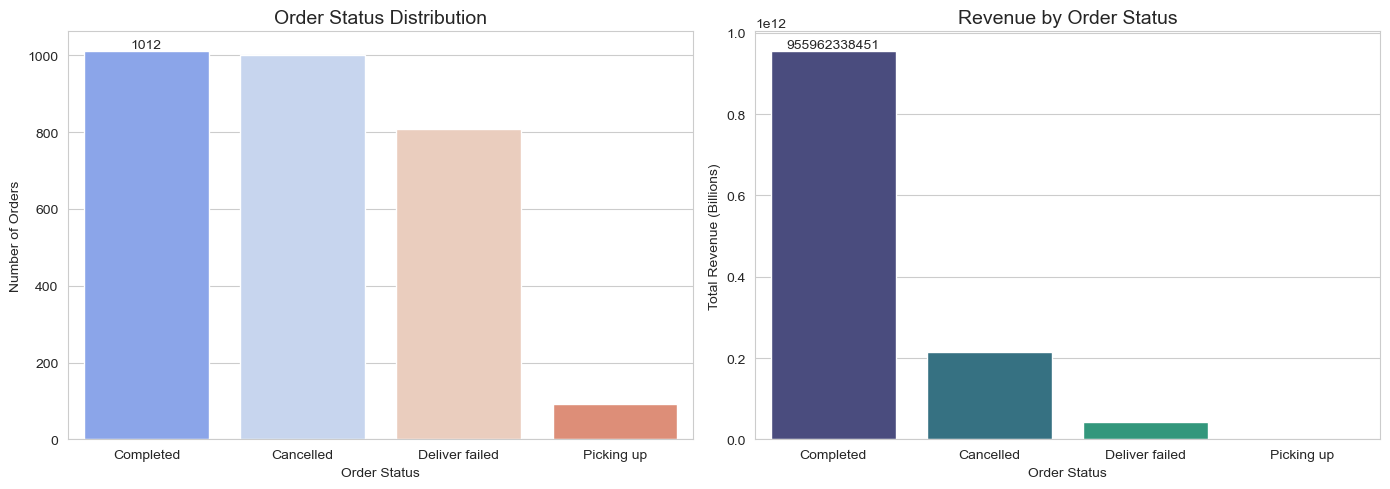

In [13]:
# Set style
sns.set_style("whitegrid")

# Figure setup
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart: Order Status Count
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette="coolwarm", ax=axes[0])
axes[0].set_title("Order Status Distribution", fontsize=14)
axes[0].set_ylabel("Number of Orders")
axes[0].set_xlabel("Order Status")
axes[0].bar_label(axes[0].containers[0])

# Bar chart: Revenue by Order Status
sns.barplot(x=revenue_by_status.index, y=revenue_by_status.values, palette="viridis", ax=axes[1])
axes[1].set_title("Revenue by Order Status", fontsize=14)
axes[1].set_ylabel("Total Revenue (Billions)")
axes[1].set_xlabel("Order Status")
axes[1].bar_label(axes[1].containers[0], fmt="%.0f")

# Show plots
plt.tight_layout()
plt.show()


### Business Performance by Category

C:\Users\minvo4\AppData\Local\Temp\ipykernel_8204\1619508988.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_summary["Category"], x=category_summary["Total_Orders"], palette="Blues_r", ax=axes[0])
C:\Users\minvo4\AppData\Local\Temp\ipykernel_8204\1619508988.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_summary["Category"], x=category_summary["Revenue_Lost_Cancellations"], palette="Reds_r", ax=axes[1])


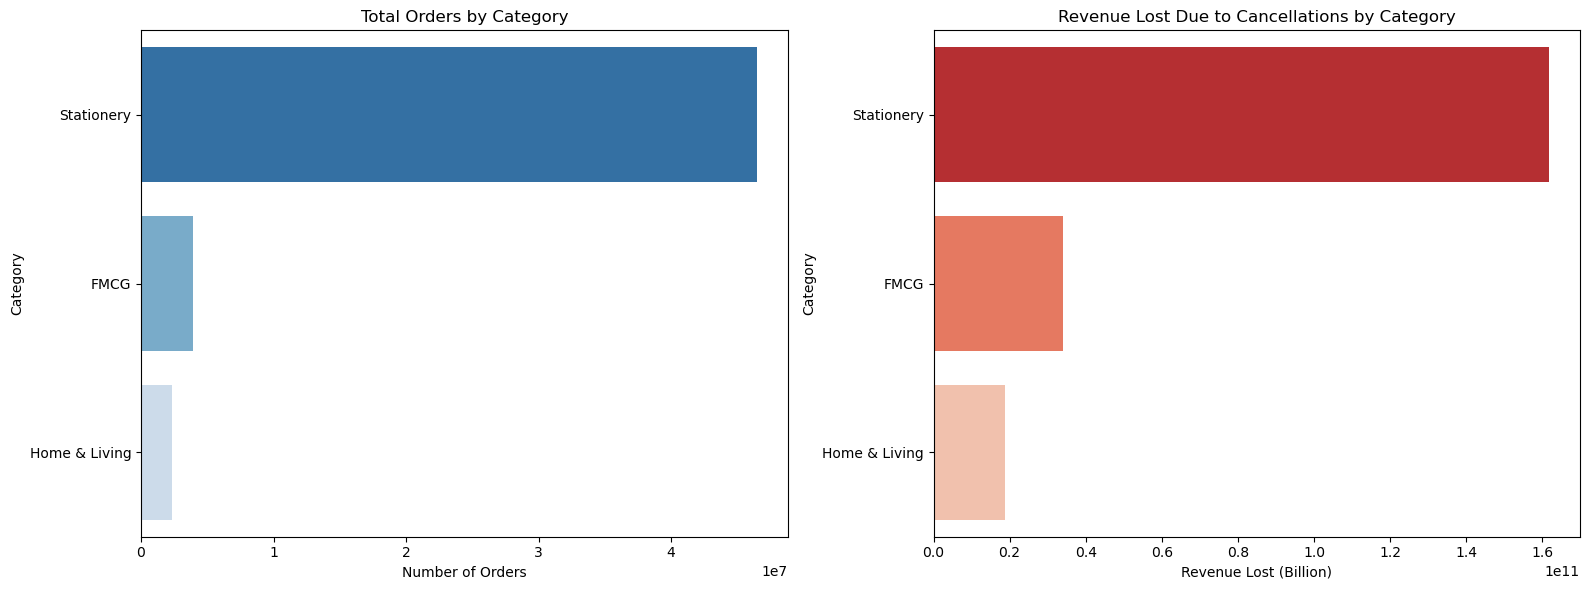

,Category,Total_Orders,Total_Revenue,Cancelled_Orders,Revenue_Lost_Cancellations
2,Stationery,46455610,9.659391e+11,7503110,1.617784e+11
1,Home & Living,2335300,5.595692e+10,746240,1.874760e+10
0,FMCG,3937280,1.910450e+11,549640,3.406635e+10


In [9]:
# Aggregate data by category
category_summary = df.groupby("Category").agg(
    Total_Orders=("# of Orders", "sum"),
    Total_Revenue=("Order value", "sum"),
    Cancelled_Orders=("# of Orders", lambda x: x[df["Status of Order"] == "Cancelled"].sum()),
    Revenue_Lost_Cancellations=("Order value", lambda x: x[df["Status of Order"] == "Cancelled"].sum())
).reset_index()

# Sort data for better visualization
category_summary = category_summary.sort_values(by="Total_Orders", ascending=False)

# Visualization: Orders & Revenue Impact per Category
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Total Orders by Category
sns.barplot(y=category_summary["Category"], x=category_summary["Total_Orders"], palette="Blues_r", ax=axes[0])
axes[0].set_title("Total Orders by Category")
axes[0].set_xlabel("Number of Orders")
axes[0].set_ylabel("Category")

# Revenue Lost from Cancellations per Category
sns.barplot(y=category_summary["Category"], x=category_summary["Revenue_Lost_Cancellations"], palette="Reds_r", ax=axes[1])
axes[1].set_title("Revenue Lost Due to Cancellations by Category")
axes[1].set_xlabel("Revenue Lost (Billion)")
axes[1].set_ylabel("Category")

plt.tight_layout()
plt.show()

# Display categories with the highest cancellation impact
category_summary.sort_values(by="Cancelled_Orders", ascending=False).head(5)